### Random Forest

In [ ]:
# Setup path to import FinancialMachineLearning modules
import sys
from pathlib import Path

# Add the MLFinance root directory to Python path
notebook_dir = Path.cwd()
project_root = notebook_dir.parent.parent.parent  # Go up from Notes/Week05Labeling to MLFinance
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))
    print(f"✓ Added {project_root} to Python path")

✓ Added /mnt/ssd_backup/equity-ml-ldp/MLFinance to Python path


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from FinancialMachineLearning.labeling.labeling import *

triple_barrier_event = pd.read_parquet('../../../Data/AAPL_triple_barrier_events.parquet')
avg_uniqueness = pd.read_parquet('../../../Data/AAPL_avg_unique.parquet')
feature_matrix = pd.read_parquet('../../../Data/AAPL_feature_matrix.parquet')
#triple_barrier_event.head()
feature_matrix.head()

,t1,trgt,pt,sl
Date,,,,
2000-01-07,2000-01-11,0.016797,2,1
2000-01-10,2000-01-12,0.026415,2,1
2000-01-11,2000-01-12,0.024043,2,1
2000-01-12,2000-01-13,0.031168,2,1
2000-01-13,2000-01-19,0.050703,2,1


In [ ]:
labels = meta_labeling(
    triple_barrier_event, 
    feature_matrix['Close']
)
labels.head()

KeyError: 'Close'

In [5]:
triple_barrier_event['side'] = labels['bin']
meta_labels = meta_labeling(
    triple_barrier_event, # with side labels
    feature_matrix['Close']
)
triple_barrier_event.head()

,t1,trgt,pt,sl,side
Date,,,,,
2000-01-07,2000-01-11,0.016797,2,1,-1.0
2000-01-10,2000-01-12,0.026415,2,1,-1.0
2000-01-11,2000-01-12,0.024043,2,1,-1.0
2000-01-12,2000-01-13,0.031168,2,1,1.0
2000-01-13,2000-01-19,0.050703,2,1,0.0


feature matrix 생성

In [6]:
feature_matrix['side'] = triple_barrier_event['side'].copy()
feature_matrix['label'] = meta_labels['bin'].copy()
feature_matrix.head(20)

,Open,High,Low,Close,Adj Close,Volume,money_flow_index,ease_of_movement,average_true_range,ulcer_index,...,skew,kurt,GC=F,JPY=X,^FVX,^GSPC,^TYX,^VIX,side,label
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.844981,5.357968e+08,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2421,NaN,NaN
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.773740,5.123776e+08,NaN,-1.743633e-06,NaN,NaN,...,NaN,NaN,NaN,0.014259,-0.009447,-0.038345,-0.010003,0.2701,NaN,NaN
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.785063,7.783216e+08,NaN,6.777578e-07,NaN,NaN,...,NaN,NaN,NaN,0.009211,0.014540,0.001922,0.015156,0.2641,NaN,NaN
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.717125,7.679728e+08,NaN,-7.201507e-06,NaN,NaN,...,NaN,NaN,NaN,0.010952,-0.006010,0.000956,-0.008898,0.2573,NaN,NaN
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.751094,4.607344e+08,NaN,-2.616959e-06,NaN,NaN,...,NaN,NaN,NaN,0.000950,-0.008217,0.027090,-0.005326,0.2172,-1.0,1.0
2000-01-10,0.910714,0.912946,0.845982,0.872768,0.737884,5.050640e+08,NaN,2.958609e-07,NaN,NaN,...,NaN,NaN,NaN,-0.001614,0.009692,0.011190,0.008108,0.2171,-1.0,1.0
2000-01-11,0.856585,0.887277,0.808036,0.828125,0.700140,4.415488e+08,NaN,-5.708216e-06,NaN,NaN,...,NaN,NaN,NaN,0.008178,0.016876,-0.013063,0.013202,0.2250,-1.0,1.0
2000-01-12,0.848214,0.852679,0.772321,0.778460,0.658151,9.760688e+08,NaN,-2.894374e-06,NaN,NaN,...,NaN,NaN,NaN,-0.002924,0.005938,-0.004386,0.003594,0.2284,1.0,1.0
2000-01-13,0.843610,0.881696,0.825893,0.863839,0.730335,1.032685e+09,NaN,2.231423e-06,NaN,NaN,...,NaN,NaN,NaN,0.002933,-0.014076,0.012170,-0.009252,0.2171,0.0,0.0


In [7]:
feature_matrix.drop(['Open','High','Low','Close','Adj Close','Volume'], axis = 1, inplace = True)

In [8]:
feature_matrix.dropna(inplace = True)
matrix = feature_matrix[feature_matrix['side'] != 0]

In [18]:
X = matrix.drop(['side','label'], axis = 1)
y = matrix['label']

In [19]:
X_train, X_test = X.loc[:'2019'], X.loc['2020':]
y_train, y_test = y.loc[:'2019'], y.loc['2020':]

Decision trees are known to be prone to overfitting, which increases the variance of predictions. Random Forest was designed to address this problem by making ensemble predictions with lower variance.

Randon Forest is similar to Bagging in that it independently learns and calculates individual estimation parameters for a bootstrapped subset of the data. The key difference compared to Bagging is that Random Forest reflects second-level randomness. When optimizing each node split, the goal is to further reduce the correlation between estimators by evaluating only a random partial sample of attributes.

The advantages of Random Forest are as follows.

1. Random Forest can reduce prediction variance like bagging without overfitting.
2. Random Forest can calculate feature importance, which will be covered as an independent topic later.
3. Random Forest can calculate out-of-bag accuracy. However, when applied to finance, there is a possibility of exaggeration.

As with bagging, Random Forests will not necessarily show lower bias than individual Decision Trees.

Overfitting still occurs when a large number of samples overlap. Bootstrapping creates essentially the same tree. Here, each decision tree is overfitted. Unlike bagging, Random Forest always fixes the size of bootstrap samples to match the training dataset. Let’s take a look at how `sklearn` handles the Random Forest overfitting problem. For illustration purposes, please refer to the classes in `sklearn`. However, this solution can be applied to any implementation.

1. Set parameter `max_features` to a lower value. This is a method of creating differences between trees.
2. Early stopping: Set the regularization parameter `min_weight_fraction_leaf` to a sufficiently large number (0.05) to ensure that the accuracy of OOB converges to the out-of-sample accuracy.
3. `BaggingClassifier` uses `DecisionTreeClassifier` as the default classifier while `max_samples` is set to the average uniqueness between samples.

```{python}
weak_model = DecisionTreeClassifier(
    criterion = 'entropy',
    max_features = 'auto',
    class_weight = 'balanced'
)
bagging = BaggingClassifier(
    base_estimator = weak_model,
    n_estimators = 1000;
    max_samples = average_uniqueness,
    max_features = 1
)
```

4. Use `RandomForestClassifier` as the default classifier for `BaggingClassifier`. Here, `max_features` is set to the average_uniqueness between samples.
```{python}
forest = RandomForestClassifier(
    n_estimators = 1; 
    criterion = 'entropy',
    bootstrap = False;
    class_weight = 'balanced_subsample'
)

bagging = BaggingClassifier(
    base_estimator = forest,
    n_estimators = 1000;
    max_samples = average_uniqueness,
    max_features = 1
)
```

5. Modify the class of `RandomForestClassifier` to replace standard bootstrapping with sequential bootstrapping.

The code below shows three ways to set up a Random Forest using different classes.

#### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from FinancialMachineLearning.sample_weights.bootstrapping import *

class SequentialRandomForestClassifier(RandomForestClassifier):
    def _generate_sample_indices(self, random_state, n_samples):
        """Generate bootstrap sample indices with sequential bootstrap method."""
        random_instance = random_state  # get the RandomState instance
        
        ind_mat = get_indicator_matrix(
            triple_barrier_event.index.to_series(),
            triple_barrier_event['t1']
        )
        
        sample_indices = seq_bootstrap(ind_mat, n_samples)
        
        return sample_indices

In [21]:
forest = SequentialRandomForestClassifier(
    criterion = 'entropy',
    class_weight = 'balanced_subsample',
    random_state = 42,
    n_estimators = 100,
    max_features = 3, # early stopping
    min_weight_fraction_leaf = 0.05, # early stopping
    oob_score = True
)

forest_fit = forest.fit(
    X = X_train, 
    y = y_train, 
    sample_weight = avg_uniqueness.loc[X_train.index].to_numpy().reshape(1, -1)[0]
)

Sequantial Bootstrapping을 적용한 OOB 정확도

In [22]:
forest_fit.oob_score_

0.8315755832534356

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

y_prob = forest_fit.predict_proba(X_test)[:, 1]
y_pred = forest_fit.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8655126498002663


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.12      0.07      0.09        70
         1.0       0.91      0.95      0.93       681

    accuracy                           0.87       751
   macro avg       0.52      0.51      0.51       751
weighted avg       0.84      0.87      0.85       751



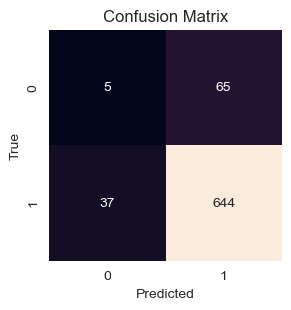

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

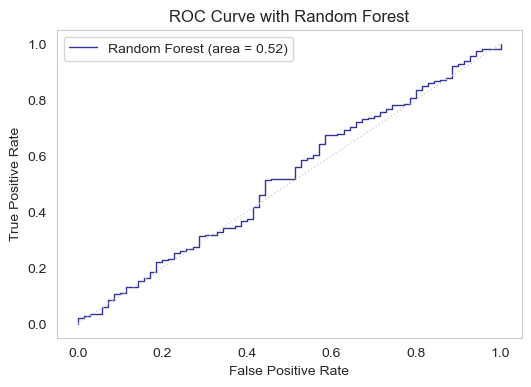

In [15]:
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'Random Forest (area = {:.2f})'.format(roc_auc), color = 'navy', alpha = 0.8, lw = 1)
plt.plot([0, 1], [0, 1], color = 'lightgray', ls = ':', lw = 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Random Forest')
plt.grid(False)
plt.legend()
plt.show()

#### Decision Tree & Bagging Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

decision_tree_weak = DecisionTreeClassifier(
    criterion = 'entropy',
    max_features = 3, # early stopping
    class_weight = 'balanced',
    min_weight_fraction_leaf = 0.05 # early stopping
)
tree_bagging = BaggingClassifier(
    base_estimator = decision_tree_weak,
    n_estimators = 1000,
    max_samples = avg_uniqueness.loc[X_train.index].mean()[0],
    random_state = 42
)

tree_bagging_fit = tree_bagging.fit(
    X = X_train, 
    y = y_train,
    sample_weight = avg_uniqueness.loc[X_train.index].to_numpy().reshape(1, -1)[0]
)

In [17]:
y_prob = tree_bagging_fit.predict_proba(X_test)[:, 1]
y_pred = tree_bagging_fit.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9067909454061251


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        70
         1.0       0.91      1.00      0.95       681

    accuracy                           0.91       751
   macro avg       0.45      0.50      0.48       751
weighted avg       0.82      0.91      0.86       751



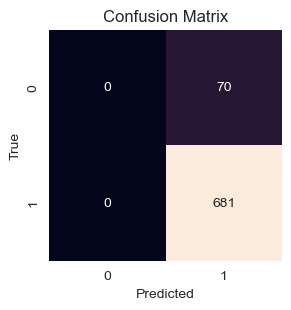

In [19]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

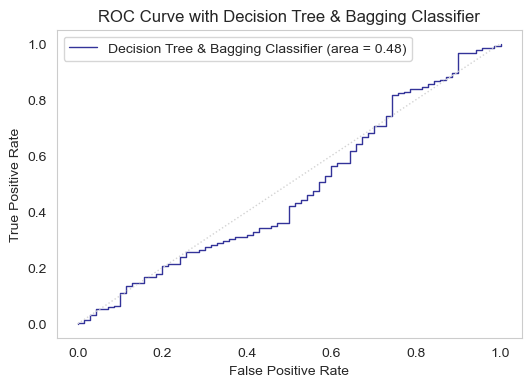

In [20]:
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'Decision Tree & Bagging Classifier (area = {:.2f})'.format(roc_auc), color = 'navy', alpha = 0.8, lw = 1)
plt.plot([0, 1], [0, 1], color = 'lightgray', ls = ':', lw = 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Decision Tree & Bagging Classifier')
plt.grid(False)
plt.legend()
plt.show()

#### RandomForest & Bagging Classifier

In [1]:
random_forest_weak = RandomForestClassifier(
    n_estimators = 1,
    criterion = 'entropy',
    bootstrap = False,
    class_weight = 'balanced_subsample',
    min_weight_fraction_leaf = 0.05,
    max_features = 3,
    random_state = 42
)
forest_bagging = BaggingClassifier(
    base_estimator = random_forest_weak,
    n_estimators = 1000,
    max_samples = avg_uniqueness.loc[X_train.index].mean()[0],
    max_features = 1,
    random_state = 42
)
forest_bagging_fit = forest_bagging.fit(
    X = X_train, 
    y = y_train,
    sample_weight = avg_uniqueness.loc[X_train.index].to_numpy().reshape(1, -1)[0]
)

NameError: name 'RandomForestClassifier' is not defined

In [22]:
y_prob = forest_bagging_fit.predict_proba(X_test)[:, 1]
y_pred = forest_bagging_fit.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9067909454061251


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        70
         1.0       0.91      1.00      0.95       681

    accuracy                           0.91       751
   macro avg       0.45      0.50      0.48       751
weighted avg       0.82      0.91      0.86       751



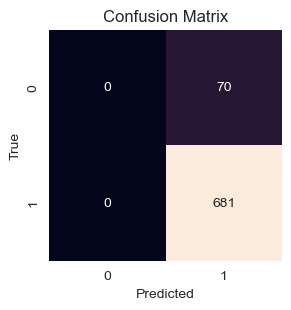

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

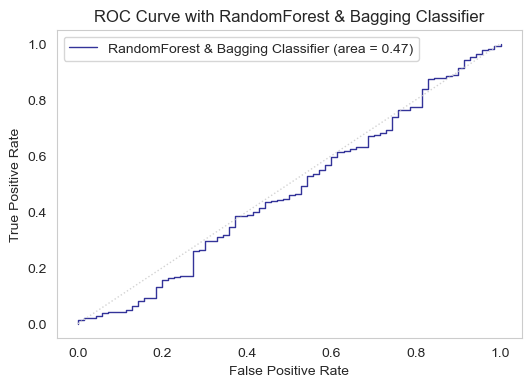

In [25]:
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'RandomForest & Bagging Classifier (area = {:.2f})'.format(roc_auc), color = 'navy', alpha = 0.8, lw = 1)
plt.plot([0, 1], [0, 1], color = 'lightgray', ls = ':', lw = 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with RandomForest & Bagging Classifier')
plt.grid(False)
plt.legend()
plt.show()

When fitting a decision tree, the number of levels required in the tree can be reduced by rotating the feature space in the direction that matches the axis. For this reason, it is recommended to adapt PCA features to Random Forest. This can be used to reduce some overfitting and improve calculation speed. Additionally, setting `class_weight = 'balanced_subsample'` prevents the Tree from misclassifying minority classes.